<a href="https://colab.research.google.com/github/pineapple-666/Introduction-to-Statistical-Learning/blob/main/Quiz1_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1: SSR

Consider the problem of predicting how well a student does in her second year of college/university, given how well she did in her first year. Specifically, let X1 be equal to the number of “A” grades (including A-, A, and A+ grades) that the student receives in her first year of college (freshmen year). We would like to predict the value of Y, which we define as the number of “A” grades she gets in her second year (sophomore year). Recall that in linear regression, our linear model is f(X) = b0+b1X1.

Here is our training dataset: X1 = c(3, 2, 4, 0); Y = c(4, 1, 3, 1).

Based on this training set, what is the residual sum of squares (RSS) for b0=0, b1=1? (Your answer should be a whole number, so do not write any decimal places.)


In [1]:
import numpy as np

Y_hat = X1 = np.array([3, 2, 4, 0])
Y = np.array([4, 1, 3, 1])

diff = Y - Y_hat
print(diff)
squared_diff = diff ** 2
print(squared_diff)
sum_squared_diff = np.sum(squared_diff)

print(sum_squared_diff)


[ 1 -1 -1  1]
[1 1 1 1]
4


# Q2: Fit a linear regression on X1 = c(3, 2, 4, 0); Y = c(4, 1, 3, 1) and get my fitted values


The ordinary least squares solution for the situation described in Question 1 is b0=0.7714, b1=0.6571, corresponding to RSS=2.97. What is f(4)? (Round your answer to one decimal place.)

In [2]:
import statsmodels.api as sm
import numpy as np

# Define the data
X1 = np.array([3, 2, 4, 0])
Y = np.array([4, 1, 3, 1])

# Add a constant term to the predictor variable
X = sm.add_constant(X1)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

dir(model)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     2.543
Date:                Fri, 26 Sep 2025   Prob (F-statistic):              0.252
Time:                        20:24:47   Log-Likelihood:                -5.0813
No. Observations:                   4   AIC:                             14.16
Df Residuals:                       2   BIC:                             12.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7714      1.110      0.695      0.5

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [ ]:
print(0.7714  + 0.6571 * 4)

intercept = model.params[0]  # The first element is the intercept
slope = model.params[1]   # The second element is the slope

f4 = intercept + slope * 4
print(f4)

3.3998
3.4000000000000004


In [3]:
## CHECK RSS IS REPLICATION

# Get the fitted values
fitted_values = model.fittedvalues

# Print the fitted values
print(fitted_values)

# find RSS from a model

def calculate_rss(y_true, y_pred):
  """
  Calculates the Residual Sum of Squares (RSS) for a model.

  Args:
    y_true: The true values of the target variable.
    y_pred: The predicted values of the target variable.

  Returns:
    The RSS value.
  """
  residuals = y_true - y_pred
  rss = np.sum(residuals ** 2)
  return rss


y_true = Y  # Assuming Y is your target variable
rss = calculate_rss(y_true, fitted_values)
print(f"RSS: {rss}")

[2.74285714 2.08571429 3.4        0.77142857]
RSS: 2.971428571428571


# Q3 Change in RSS when adding more predictors

Suppose that for the situation described in Questions 1 and 2 we have a second predictor variable, X2, available and we fit the model f(X)=b0+b1X1+b2X2 using ordinary least squares. What will the value of RSS be for this model? (Select the single best answer.)

![image.png](attachment:image.png)

- (a) Less than (or equal to) 2.97, because the RSS will either decrease (if $X_2$ adds value) or stay the same (if $X_2$ has no impact).

# Q4

Suppose that for some linear regression problem (say, predicting housing prices), we have a training set, and for our training set we managed to find values of b0 and b1 such that RSS=0. Which of the statements below must then be true? (Check all that apply.)

![image.png](attachment:image.png)

- c) For these values of b0 and b1 that satisfy RSS=0, we have that f(Xi)=Yi for every training example (Xi, Yi).

https://botlnec.github.io/islp/sols/chapter3/exercise3/

# Q5: Interpretation with interaction terms

Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use ordinary least squares to fit the model, and get β0 = 50, β1 = 20, β2 = 0.07, β3 = 35, β4 = 0.01, β5 = −10 (assume these β's have "hats"). Which of the following is a true statement? (Select the single best answer.)

```
Salary = 50 + 20 * GPA + 0.07 * IQ + 35 * Gender (female==1) + 0.01 * GPA * IQ - 10 * GPA * Gender (female==1)
```

```
Salary   (Male) = 50 + 20 * GPA + 0.07 * IQ + 0.01 * GPA * IQ
```



```
Salary (Female) = 50 + 20 * GPA + 0.07 * IQ + 35 + 0.01 * GPA * IQ - 10 * GPA
```

Salary(female) - Salary (male) = 35 - 10 * GPA -> equal salary at 3.5 GPA.

Female > male when GPA is less than 3.5

# Q6:  Males earn more than females?

Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use ordinary least squares to fit the model, and get β0 = 50, β1 = 20, β2 = 0.07, β3 = 35, β4 = 0.01, β5 = −10 (assume these β's have "hats"). Which of the following is a true statement? (Select the single best answer.)

![image.png](attachment:image.png)

c) For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is higher than 3.5.

**For IQ of 110 and GPA of 0, wage for male is more than wage of female**.

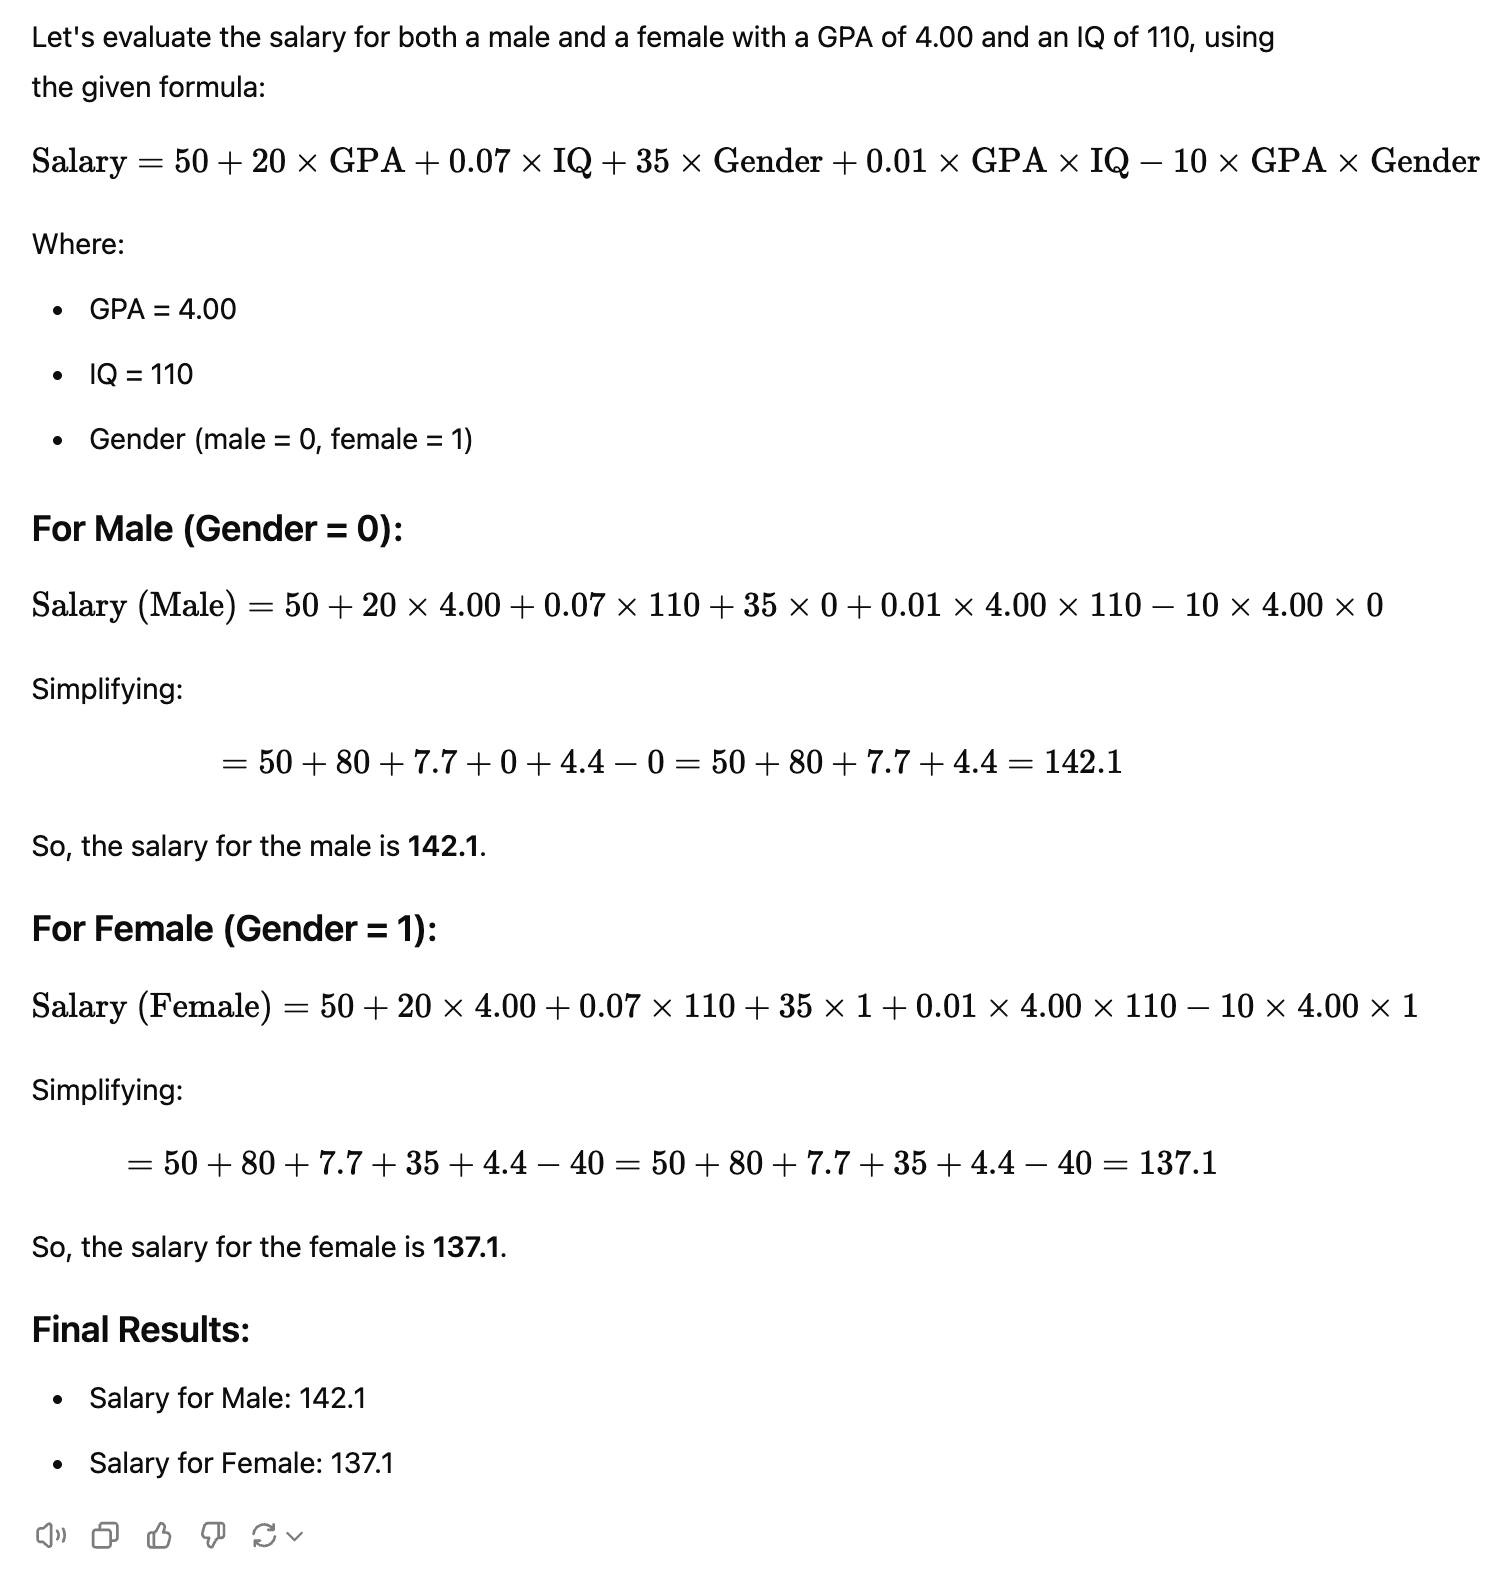

**For IQ of 110 and GPA of 0, wage for male is less than wage of female**.

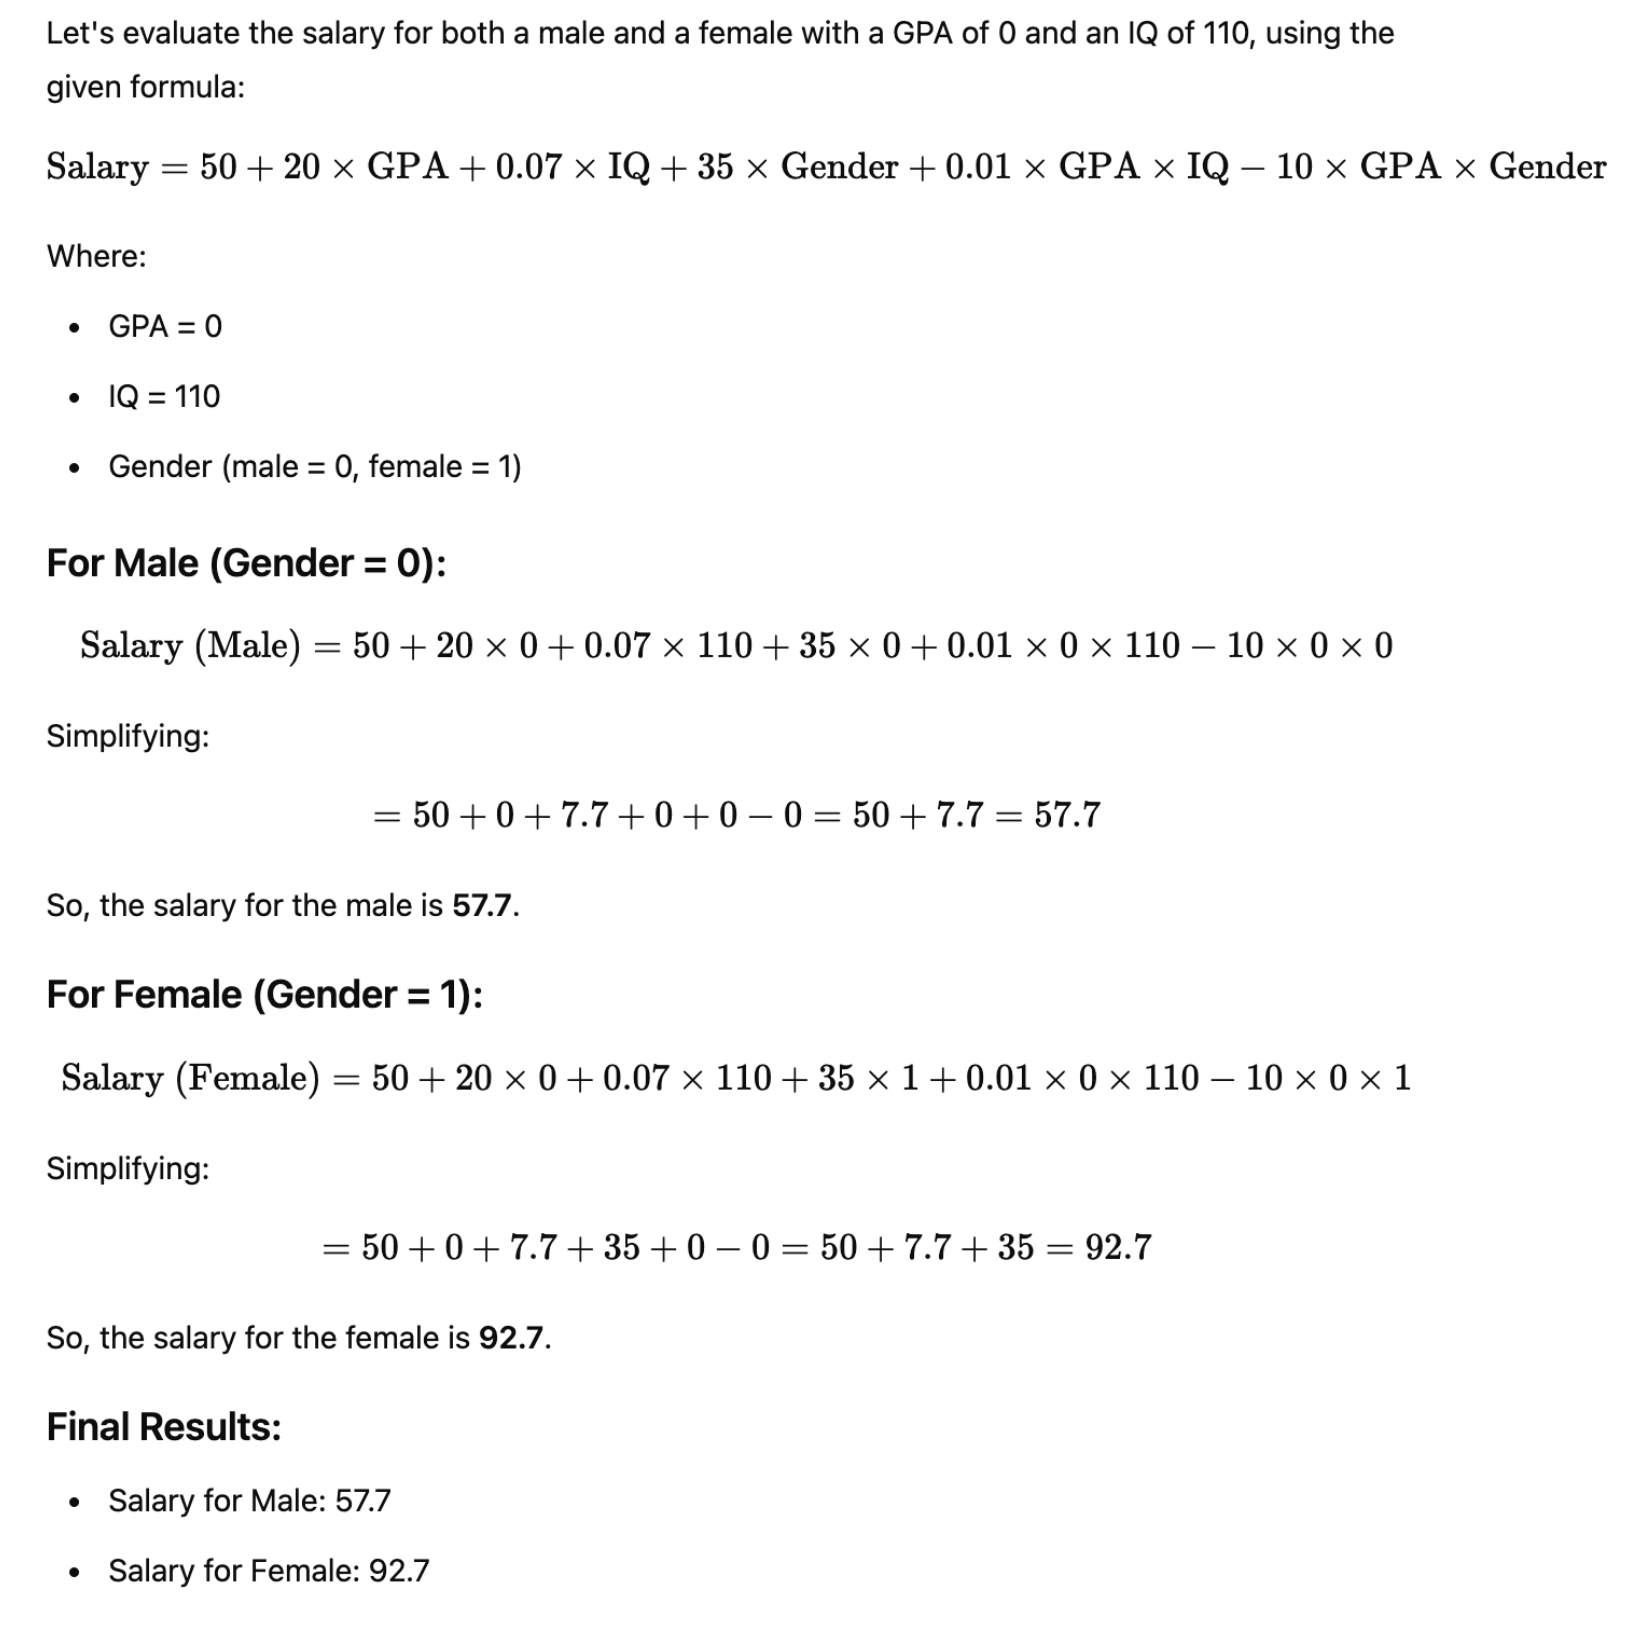

# Q7: Prediction

Predict the salary (in thousands of dollars) of a female with `IQ` of 110 and a `GPA` of 4.0 for the situation described in Question 6. Round your answer to the nearest whole number.


Estimating Equation:  

Salary (Female) = 50 + 20 * GPA + 0.07 * IQ + 35 + 0.01 * GPA * IQ - 10 * GPA

- Substitue the values of IQ and GPA.

In [ ]:
50 + 20 * 4 + 0.07 * 110 + 35 *1  + 0.01 * 4 * 110 -10  * 4 * 1

137.1

# Q8: t statistic

For the situation described in Questions 6 and 7, is the following statement true or false? "Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect."




**False.**
Although the coefficient for the GPA/IQ interaction term is very small, specially when compared to the other coefficients, this does not indicate whether there is an interaction effect. First, this coefficient is multiplied by the product of IQ and GPA which ranges from 0 to a few hundred, so that the contribution to the response would tipically add up to a value between 2 and 6, let's say. Secondly, and more importantly, evidence for the interaction effect has to be evaluated with a t-statistic or an F-statistic for a null hypothesis (H0:β4=0
), yielding a certain p-value. This requires the standard error of which we have no information, and therefore cannot conclude whether there is evidence for a interaction effect.



https://botlnec.github.io/islp/sols/chapter3/exercise3/

## Appendix:  Lab approximations

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)




[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
Boston = load_data("Boston")
Boston.columns
?load_data


NameError: name 'load_data' is not defined

## VIF

In [ ]:
# Step 1: Select features excluding 'medv' and 'age'
minus_age = Boston.columns.drop(['medv', 'age'])
print(type(minus_age))  # Should output: <class 'pandas.core.indexes.base.Index'>

# Step 2: Extract the features and optionally standardize them
Xma = Boston[minus_age]
print(type(Xma))  # Should output: <class 'pandas.core.frame.DataFrame'>

# Step 3: Add a constant term for the intercept
Xma = sm.add_constant(Xma)

# Step 4: Define the target variable
y = Boston['medv']

# Step 5: Fit the OLS model
model = sm.OLS(y, Xma).fit()

# Step 6: Summarize the model
print(model.summary())


print(model.summary())
# List all available attributes and methods of the infl object
print(dir(model.summary()))


# Step 7: Get influence measures
influence = model.get_influence()

# Step 8: Get the summary frame of influence measures
summary = influence.summary_frame()
print(summary.head())  # Display the first few rows of the summary

print("Studentized Resid Index: ", summary['student_resid'].idxmax(), "\nStudentized Resid Max: ", summary['student_resid'].max(), "\n")
print("Leverages Index: ", summary['hat_diag'].idxmax(), "\nLeverages Max: ", summary['hat_diag'].max(), "\n")
print("Cooks Distance Index: ", summary['cooks_d'].idxmax(), "\nCooks Distance Max: ", summary['cooks_d'].max())

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.frame.DataFrame'>
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          2.03e-134
Time:                        17:38:22   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [ ]:
y = Boston['medv']
X = MS(['lstat',
        'age',
        ('lstat', 'age')]
       ).fit_transform(Boston)
model1 = sm.OLS(y, X).fit()


X = MS(['lstat',
        'rm',
        ('lstat', 'rm')]
       ).fit_transform(Boston)
model2 = sm.OLS(y, X).fit()


anova_lm(model1, model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,18977.716145,0.0,NaN,NaN,NaN
1,502.0,11095.726194,-0.0,7881.989951,-inf,NaN


## Regression (With Intercept)

In [ ]:
# Create a new column with log(rm)
Boston['log_rm'] = np.log(Boston['rm'])

# Define the model specification
model_spec = MS(['log_rm']).fit_transform(Boston)

# Fit the model
model = sm.OLS(Boston['medv'], model_spec).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.22e-64
Time:                        17:38:22   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -76.4878      5.028    -15.213      0.0

## Regression (With Intercept) - Alternative Specification

In [ ]:
# Load the Boston dataset and create a copy
Boston = load_data("Boston")
myBoston = Boston.copy()

# Add the log-transformed rm variable to the copied dataset
myBoston['log_rm'] = np.log(myBoston['rm'])

# Define the formula for the linear regression model
formula = "medv ~ log_rm"

# Fit the model using the formula and the copied dataset
model = smf.ols(formula=formula, data=myBoston)
results = model.fit()

# Print the results summary
print(results.summary())

# Extract the coefficient estimate for the slope (log_rm)
slope_coefficient = results.params['log_rm']

# Print the coefficient estimate rounded to 1 decimal place
print(f"\nCoefficient estimate for the slope (log_rm): {slope_coefficient:.1f}")

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.22e-64
Time:                        17:38:22   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

### Regression (Without Intercept)

In [ ]:
# Add the log-transformed rm variable to the copied dataset
myBoston['log_rm'] = np.log(myBoston['rm'])

# Define the formula for the linear regression model without intercept
formula = "medv ~ log_rm - 1" # -1 removes the intercept

# Fit the model using the formula and the copied dataset
model = smf.ols(formula=formula, data=myBoston)
results = model.fit()

# Print the results summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              3798.
Date:                Mon, 10 Feb 2025   Prob (F-statistic):                   4.33e-237
Time:                        17:38:22   Log-Likelihood:                         -1791.0
No. Observations:                 506   AIC:                                      3584.
Df Residuals:                     505   BIC:                                      3588.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------